<center>
    <h1><b>SMS Spam Detection</b></h1>
    <h2><b>ITE1901</b> - Technical Answers to Real-World Problems (TARP)</h2>
</center>
<br><br>
<b>Group Member:</b> 19BIT0346 - Aashish Bansal

# Connecting to Google Drive

In [39]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [1]:
#importing the necessary packages to process or plot the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

# Importing Data

In [2]:
data = pd.read_csv('D:\Semester 6\TD1 - ITE1901 - TARP - Balakrushna Tripathy - Project\Project - ITE1901 - TARP\src\dataset\spam.csv', encoding='ISO-8859-1')#,names=['v1','v2'])

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Exploratory Data Analysis

In [4]:
data.shape

(5572, 5)

In [5]:
data.describe(include='all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
#describe data by group - use pandas groupby('v1').describe() method
data.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [7]:
#Calculating the length of all the messages
data['length']=data['v2'].apply(len)
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


# Data Visualization

## Distribution spam/non-spam plots as Bar Graph

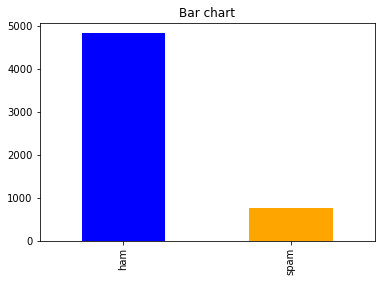

In [8]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

## Distribution spam/non-spam plots as a Pie Chart

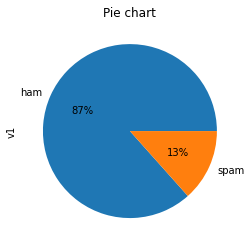

In [9]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.show()

# Text Analysis and Data Cleaning for Feature Extraction

## Frequency of Words

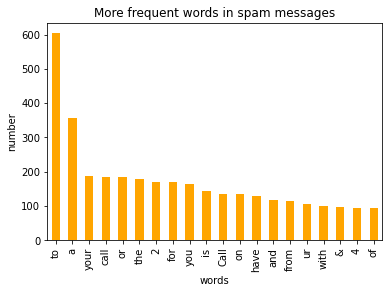

In [10]:
#import counter function
from collections import Counter

#using counter
count1 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in spam", 1 : "count_"})
df1.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df1["words in spam"]))
plt.xticks(y_pos, df1["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

## Removing Stop Words

In [11]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
#removing the stop-words from the messages(complete dataset)
data['v2']=data['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## Checking the Frequency of Words after removing Stop Words

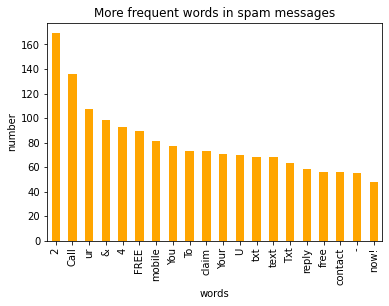

In [12]:
## rewrite the counter code here, and check the most frequent words 
#using counter
count1 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in spam", 1 : "count_"})
df1.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df1["words in spam"]))
plt.xticks(y_pos, df1["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

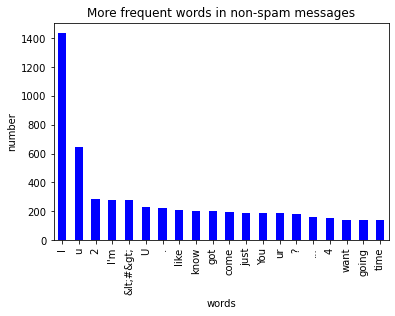

In [13]:
##todo:Do the same for finding most frequent words in Non-Spam messages:

#note: stop words are already removed from all ham/spam sentences 

#using counter
count2 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in non-spam", 1 : "count_"})
df2.plot.bar(legend = False, color = 'blue')
y_pos = np.arange(len(df2["words in non-spam"]))
plt.xticks(y_pos, df2["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

# Feature engineering


## Scikit learn Count Vectorizers

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

In [15]:
text

['The quick brown fox jumped over the lazy dog.']

In [16]:
# create the transform
vectorizer = CountVectorizer()

In [17]:
# tokenize and build vocab
vectorizer.fit(text)

CountVectorizer()

In [18]:
# summarize
print(vectorizer.vocabulary_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}


In [19]:
# encode document
vector = vectorizer.transform(text)

In [20]:
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


### Vectorize spam message data ie. data["v2"]

In [21]:
#todo : vectorise the messages

from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# list of text documents
text = data['v2']

In [23]:
text

0       Go jurong point, crazy.. Available bugis n gre...
1                           Ok lar... Joking wif u oni...
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                       U dun say early hor... U c say...
4                       Nah I don't think goes usf, lives
                              ...                        
5567    This 2nd time tried 2 contact u. U won å£750 P...
5568                   Will Ì_ b going esplanade fr home?
5569             Pity, * mood that. So...any suggestions?
5570    The guy did bitching I acted like i'd interest...
5571                                       Rofl. Its true
Name: v2, Length: 5572, dtype: object

In [24]:
# create the transform
vectorizer = CountVectorizer()

In [25]:
# tokenize and build vocab
vectorizer.fit(text)

CountVectorizer()

In [26]:
# summarize
#print the vocalbulary - very large
# print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)

In [27]:
vector

<5572x8634 sparse matrix of type '<class 'numpy.int64'>'
	with 51328 stored elements in Compressed Sparse Row format>

In [28]:
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(5572, 8634)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Predictive Analysis

In [29]:
data['label_num']=data.v1.map({'ham':0,'spam':1})
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length,label_num
0,ham,"Go jurong point, crazy.. Available bugis n gre...",NaN,NaN,NaN,111,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,0
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,NaN,NaN,NaN,155,1
3,ham,U dun say early hor... U c say...,NaN,NaN,NaN,49,0
4,ham,"Nah I don't think goes usf, lives",NaN,NaN,NaN,61,0


# Splitting Data

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(vector.toarray(), data['label_num'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8634), (1839, 8634)]


In [31]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
y_train

3235    0
945     0
5319    0
5528    0
247     0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: label_num, Length: 3733, dtype: int64

In [33]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
4944    0
3313    0
3652    0
14      0
4758    1
Name: label_num, Length: 1839, dtype: int64

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [36]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#Loading all classifier
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha =0.2)
gnb  = GaussianNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100,random_state=11)

In [37]:
abc = AdaBoostClassifier(n_estimators =100,random_state=11)

In [38]:
#defining functions for training and testing data

def training(clf,X_train,y_train):
    clf.fit(X_train,y_train)
    
#function for predicting labels

def predict(clf,X_test):
    return clf.predict(X_test)

In [39]:
#predict and storing score of each classifier
score = []

In [40]:
#defining a dictionary of classifier
classifier={'SVM': svc , 'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc}

In [41]:
for n,c in classifier.items():
    print("n: ",n)
    print("c: ",c)

n:  SVM
c:  SVC(kernel='linear')
n:  MultinomialNB
c:  MultinomialNB(alpha=0.2)
n:  GaussianNB
c:  GaussianNB()
n:  logistic
c:  LogisticRegression(penalty='l1', solver='liblinear')
n:  RandomForest
c:  RandomForestClassifier(random_state=11)
n:  Adaboost
c:  AdaBoostClassifier(n_estimators=100, random_state=11)


In [42]:
for n,c in classifier.items():
    training(c,X_train,y_train)
    pred = predict(c,X_test)
    score.append((n,accuracy_score(y_test,pred),precision_score(y_test,pred),recall_score(y_test,pred),f1_score(y_test,pred)))

In [43]:
# training(c,X_train.toarray(),y_train)
# pred = predict(c,X_test.toarray())
# score.append((n,accuracy_score(y_test,pred),precision_score(y_test,pred),recall_score(y_test,pred),f1_score(y_test,pred)))

In [44]:
print(score)

[('SVM', 0.9809679173463839, 0.9954337899543378, 0.8650793650793651, 0.9256900212314226), ('MultinomialNB', 0.9815116911364872, 0.9224806201550387, 0.9444444444444444, 0.9333333333333332), ('GaussianNB', 0.8983143012506797, 0.5826972010178118, 0.9087301587301587, 0.7100775193798451), ('logistic', 0.9787928221859706, 0.9863013698630136, 0.8571428571428571, 0.9171974522292993), ('RandomForest', 0.9749864056552474, 0.9951923076923077, 0.8214285714285714, 0.9), ('Adaboost', 0.9700924415443176, 0.9264069264069265, 0.8492063492063492, 0.8861283643892339)]


In [45]:
score_df=pd.DataFrame(score,columns=['classifier','acc','precision','recall','f1_score'])
#Adding accuracy column
score_df['Accuracy (%)']=score_df['acc']*100
score_df

,classifier,acc,precision,recall,f1_score,Accuracy (%)
0,SVM,0.980968,0.995434,0.865079,0.925690,98.096792
1,MultinomialNB,0.981512,0.922481,0.944444,0.933333,98.151169
2,GaussianNB,0.898314,0.582697,0.908730,0.710078,89.831430
3,logistic,0.978793,0.986301,0.857143,0.917197,97.879282
4,RandomForest,0.974986,0.995192,0.821429,0.900000,97.498641
5,Adaboost,0.970092,0.926407,0.849206,0.886128,97.009244


## Confusion matrix with support vector machine classifier

In [46]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test.toarray()))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0(ham)', 'Predicted 1(spam)'], index = ['Actual 0(ham)', 'Actual 1(spam)'])

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'